In [31]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

In [32]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

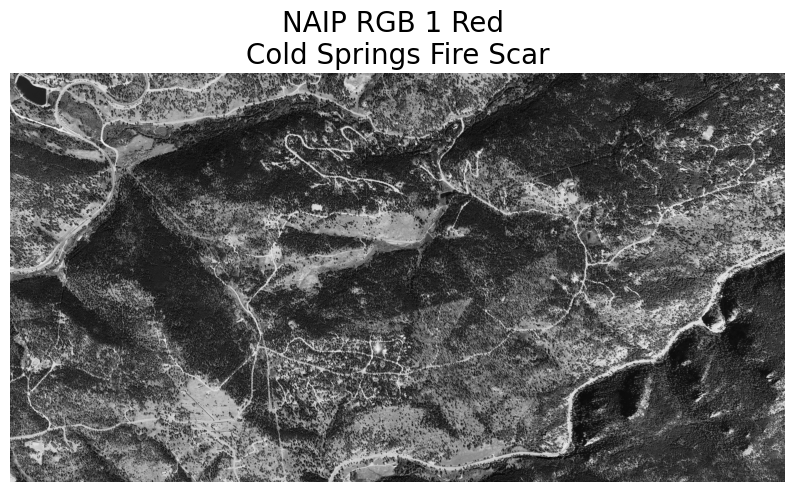

In [33]:
fig, ax = plt.subplots()

ax.imshow(naip_data[0], 
          cmap="Greys_r")
ax.set_title("NAIP RGB 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

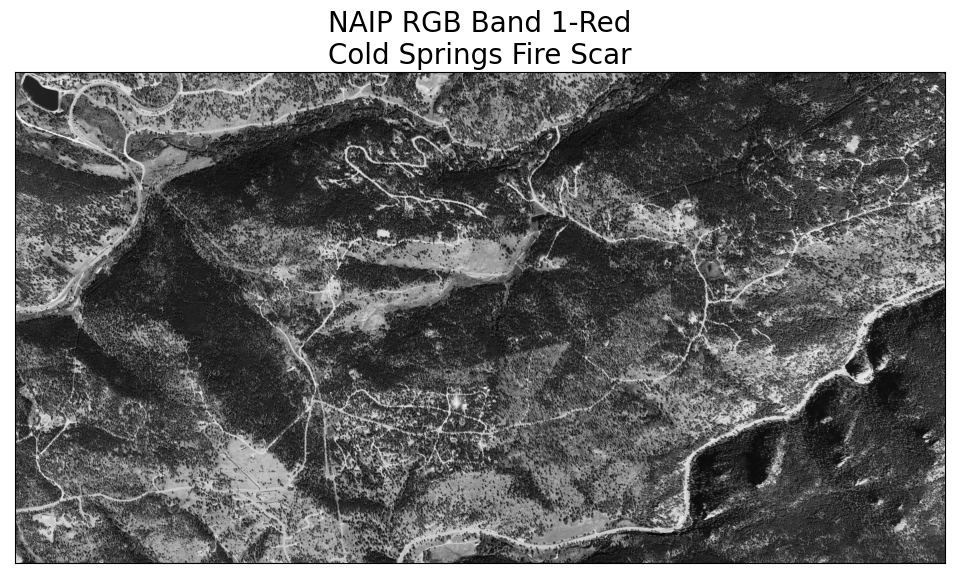

In [34]:
ep.plot_bands(naip_data[0],
              title="NAIP RGB Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

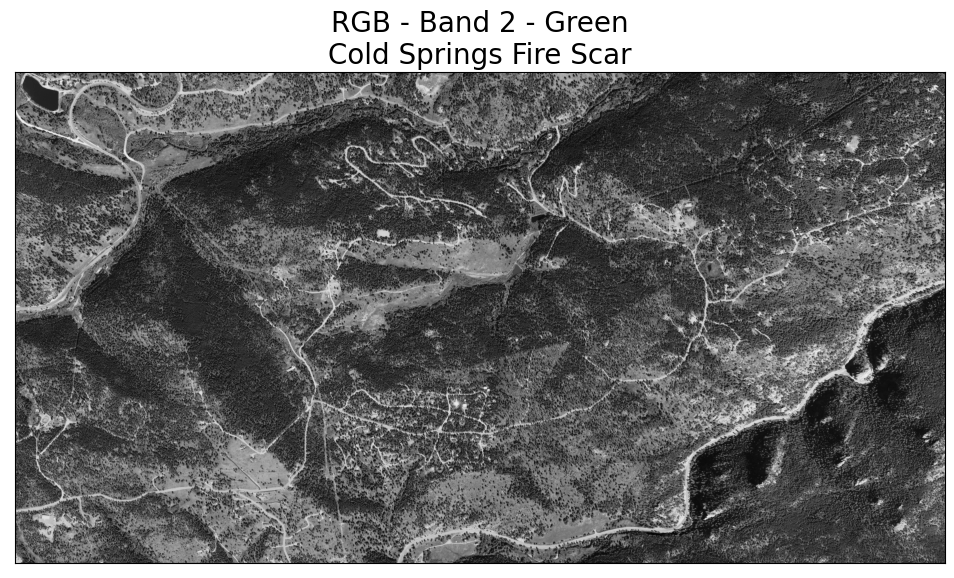

In [35]:
ep.plot_bands(naip_data[1],
              title="RGB - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

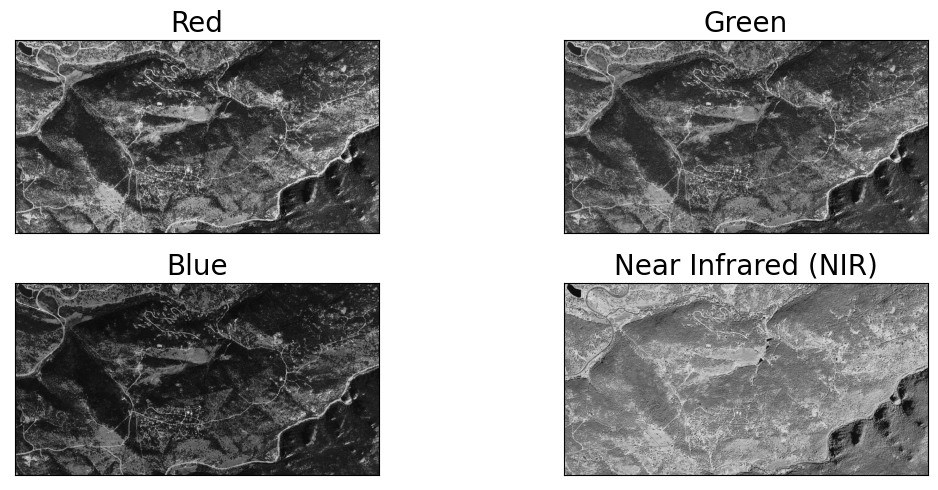

In [36]:
titles = ["Red", "Green", "Blue", "Near Infrared (NIR)"]

ep.plot_bands(naip_data, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

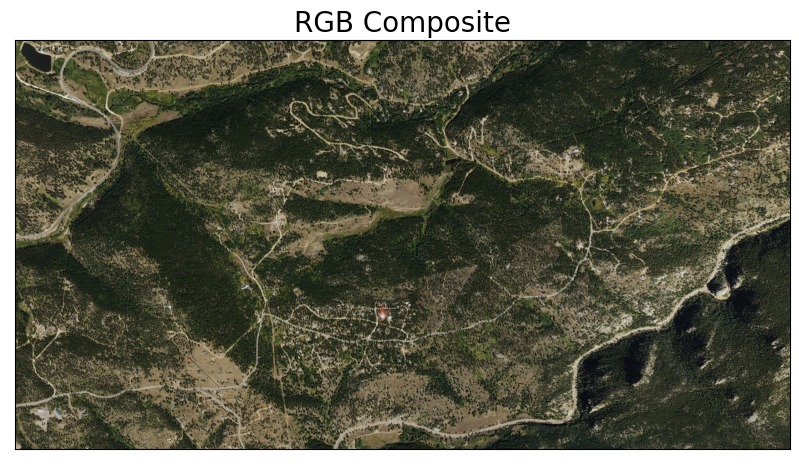

In [37]:
ep.plot_rgb(naip_data.values,
            rgb=[0, 1, 2],
            title="RGB Composite")
plt.show()

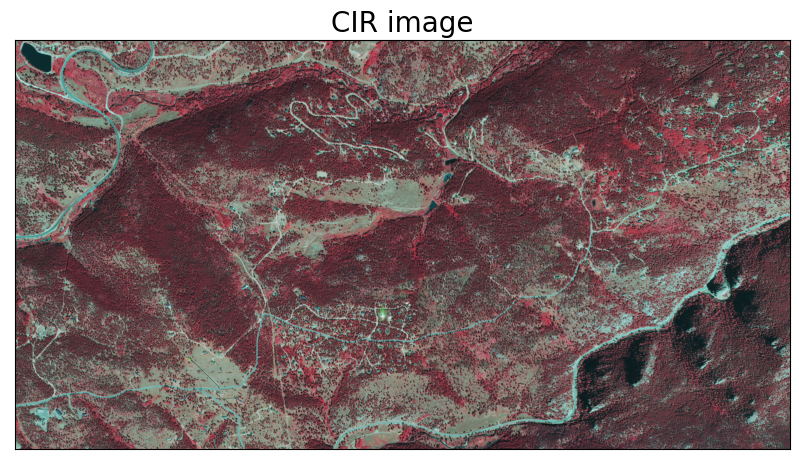

In [38]:
ep.plot_rgb(naip_data.values, title="CIR image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

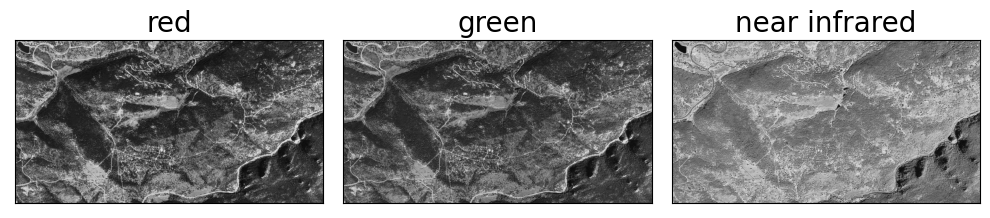

In [39]:
titles = ['red', 'green', 'near infrared']
ep.plot_bands(naip_data[[0, 1, 3]],
              figsize=(10,  7),
              title=titles,
              cbar=False)
plt.show()

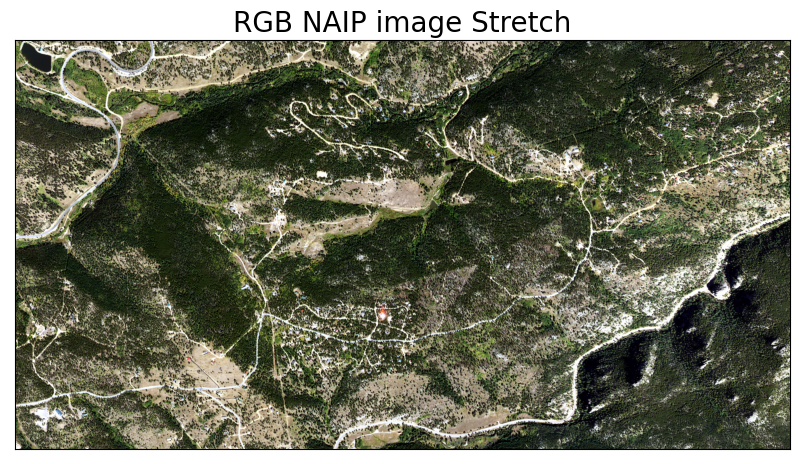

In [46]:
band_indices = [0, 1, 2]

ep.plot_rgb(naip_data.values,
            rgb=band_indices,
            title="RGB NAIP image Stretch",
            figsize=(10, 8),
            stretch=True)
plt.show()

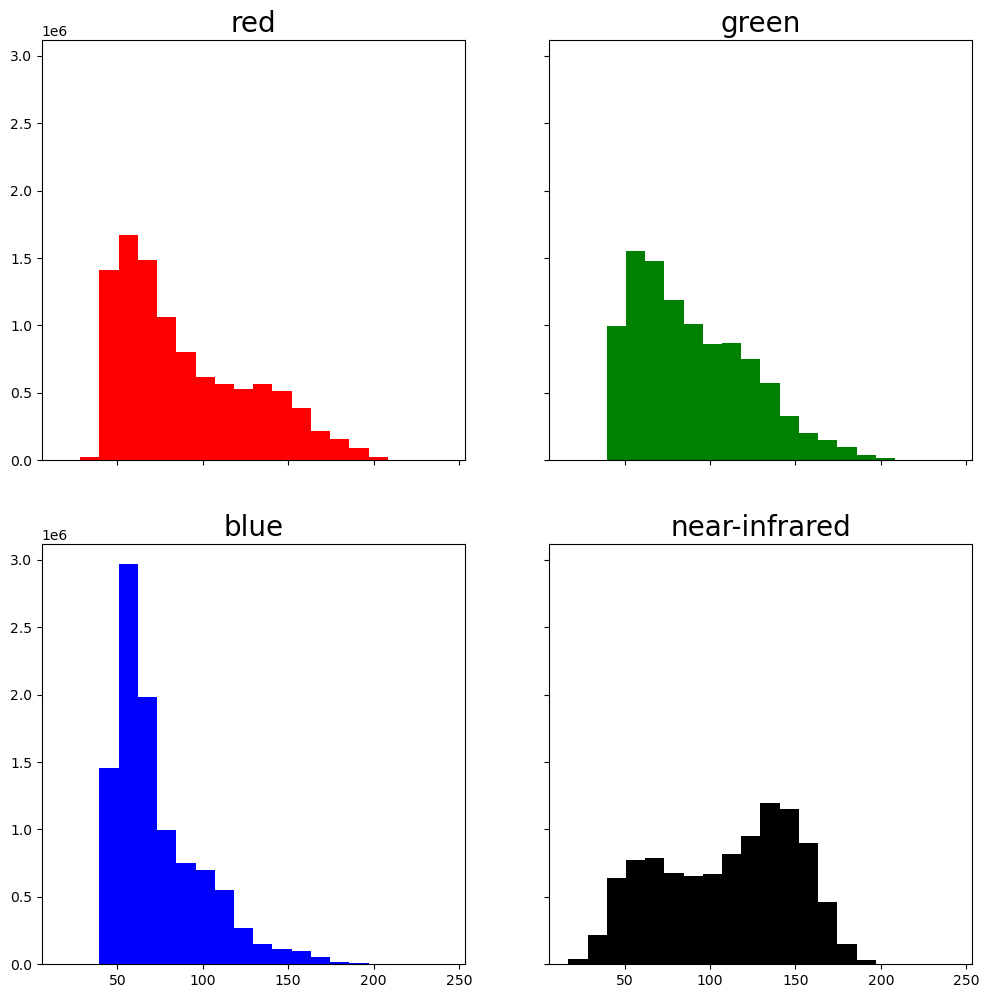

In [41]:
colors = ['r', 'g', 'b', 'k']
titles = ['red', 'green', 'blue', 'near-infrared']

ep.hist(naip_data.values, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()

In [42]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

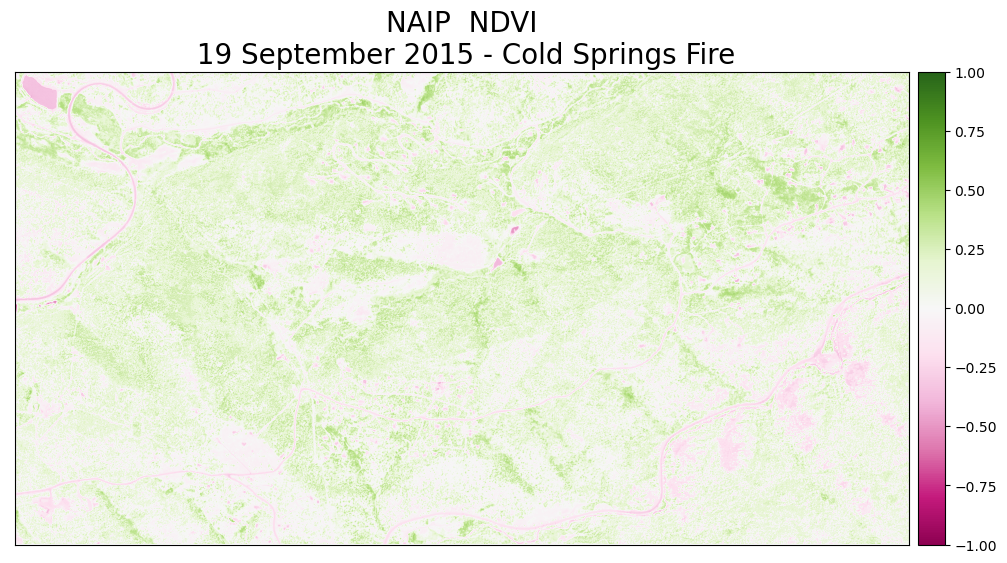

In [43]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP  NDVI\n 19 September 2015 - Cold Springs Fire")
plt.show()

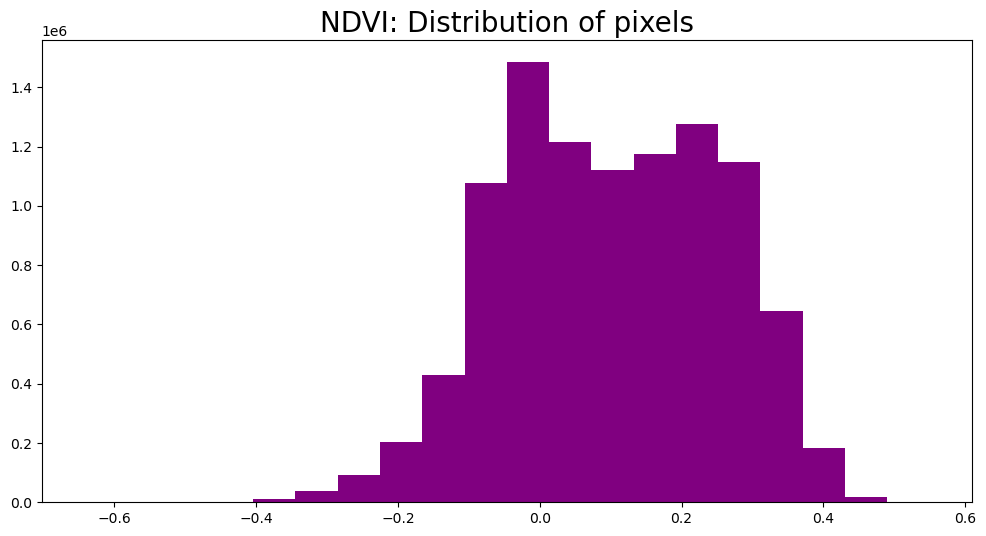

In [44]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels"])

plt.show()

In [45]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

naip_ndvi.rio.to_raster(naip_ndvi_outpath)